In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
def RandomWalk(steps, bias):
    pos = [0]
    for step in range(steps-1):
        if np.random.random() < bias: pos.append(pos[-1]+1)
        else: pos.append(pos[-1]-1)
    return pos

Walks = []

for walk in range(200):
    Walks.append(RandomWalk(30, .6)[-1])

mean_exp = (.6 - .4) * 30
mean_smp = np.mean(Walks)

var_exp = np.average(np.square(Walks))-np.square(mean_exp)
var_smp = np.var(Walks)

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


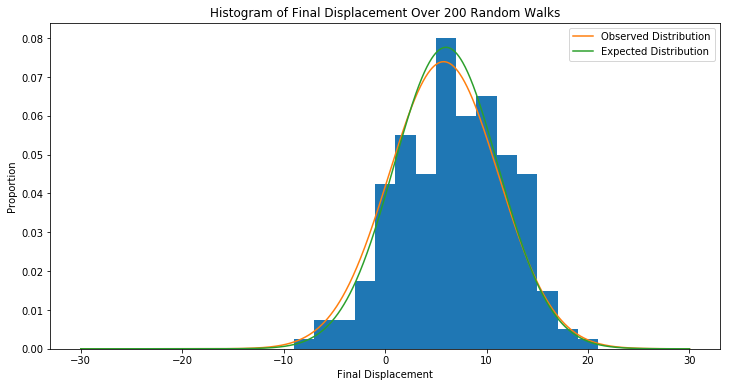

-----
Expected Mean:     5.999999999999998
Sample Mean:       5.77
-----
Expected Variance: 26.40000000000002
Sample Variance:   29.1071


In [5]:
plt.figure(figsize=(12,6))

plt.title("Histogram of Final Displacement Over 200 Random Walks")
plt.xlabel("Final Displacement")
plt.ylabel("Proportion")
plt.hist(Walks, bins=15, normed=True)
gaussian_x = np.linspace(-30,30,1000)
gaussian_y = np.multiply(norm.pdf(gaussian_x, mean_smp, np.sqrt(var_smp)),1)
expected_y = np.multiply(norm.pdf(gaussian_x, mean_exp, np.sqrt(var_exp)),1)
plt.plot(gaussian_x, gaussian_y, label= "Observed Distribution")
plt.plot(gaussian_x,expected_y, label= "Expected Distribution")
plt.legend()

plt.show()

print("-----")
print("Expected Mean:     " + str(mean_exp))
print("Sample Mean:       " + str(mean_smp))
print("-----")
print("Expected Variance: " + str(var_exp))
print("Sample Variance:   " + str(var_smp))